# Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from collections import Counter

# Dataset


In [ ]:
data = pd.read_csv('aug_train.csv')
data.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
586,13597,city_36,0.893,Male,Has relevent experience,no_enrollment,Masters,STEM,12,10000+,Pvt Ltd,1,107,0.0
13512,20114,city_136,0.897,Male,No relevent experience,Full time course,Masters,STEM,10,<10,Funded Startup,1,80,0.0
16868,30411,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,1,32,0.0
2045,24320,city_73,0.754,Male,No relevent experience,Full time course,Graduate,STEM,6,1000-4999,Pvt Ltd,3,8,0.0
4816,6470,city_89,0.925,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,1,34,0.0
13853,6737,city_71,0.884,NaN,Has relevent experience,Part time course,Masters,STEM,10,100-500,NaN,3,7,0.0
5976,13017,city_41,0.827,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,100-500,Pvt Ltd,1,30,0.0
8467,18876,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,100-500,Pvt Ltd,1,82,0.0
411,4642,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,<10,NGO,1,8,0.0
7257,15783,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,7,NaN,NaN,never,27,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Description
With the help of these features we have to predict which data scientist is looking for a job change and thus, is a better prospect in terms of hiring.

* enrollee_id : Unique ID (Useless here)
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Total experience in years
* company_size: No of employees in current company
* company_type : Type of current company
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed

    **target: 0 – Not looking for job change, 1 – Looking for a job change**

## Data Exploration

For EDA, I used this library that provides almost all the relevent information we need. So we don't have to manually look around the data ( Saves time:) )


In [ ]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Preprocessing
**Label encoding "city" feature**

In [ ]:
le = LabelEncoder()

data['city'] = le.fit_transform(data['city'])
data['city'].head(5)

0     5
1    77
2    64
3    14
4    50
Name: city, dtype: int64

**Manual encoding ordinal features**
Some of the categorical features in this dataset are ordinal, i.e,there is a clear ordering of the categories. So I have manually encoded these.

In [ ]:
gender_map = {
    'Female' : 2,
    'Male' : 1,
    'Other' : 0
    }

relevent_experience_map = {
    'Has relevent experience' : 1,
    'No relevent experience' : 0
    }

enrolled_university_map = {
    'no_enrollment' : 0,
    'Part time course' : 1,
    'Full time course' : 2
    }

education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3,
    'High School'    :    1,
    'Phd'            :    4
    }

major_map = {
    'STEM' : 0,
    'Business Degree' : 1,
    'Humanities' : 2,
    'Arts' : 3,
    'Other' : 4,
    'No Major' : 5
    }

experience_map = {
    '<1' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
    '14' : 14,
    '15' : 15,
    '16' : 16,
    '17' : 17,
    '18' : 18,
    '19' : 19,
    '20' : 20,
    '>20' : 21
    }

size_map = {
    '<10' : 0,
    '10/49' : 1,
    '50-99' : 2,
    '100-500' :3,
    '500-999' :4,
    '1000-4999': 5,
    '5000-9999' : 6,
    '10000+' : 7
    }

company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1,
    'Early Stage Startup'   :    2,
    'Other'                 :    3,
    'Public Sector'         :    4,
    'NGO'                   :    5
}

last_new_job_map = {
    'never'        :    0,
    '1'            :    1,
    '2'            :    2,
    '3'            :    3,
    '4'            :    4,
    '>4'           :    5
}

data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
data.loc[:,'company_size'] = data['company_size'].map(size_map)
data.loc[:,'company_type'] = data['company_type'].map(company_type_map)
data.loc[:,'last_new_job'] = data['last_new_job'].map(last_new_job_map)
data.loc[:,'major_discipline'] = data['major_discipline'].map(major_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'gender'] = data['gender'].map(gender_map)
data.loc[:,'experience'] = data['experience'].map(experience_map)

# Handling missing data with knn
As we saw in the EDA report, there is a lot of missing data which we can deal with the help of KNN Imputer

In [ ]:
knn_imputer = KNNImputer()
#making a copy just in case
copy = data.copy()

copy = knn_imputer.fit_transform(copy)
#rounding the knn values
copy[:, 3:] = np.round(copy[:, 3:])
data = pd.DataFrame(copy, columns = data.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

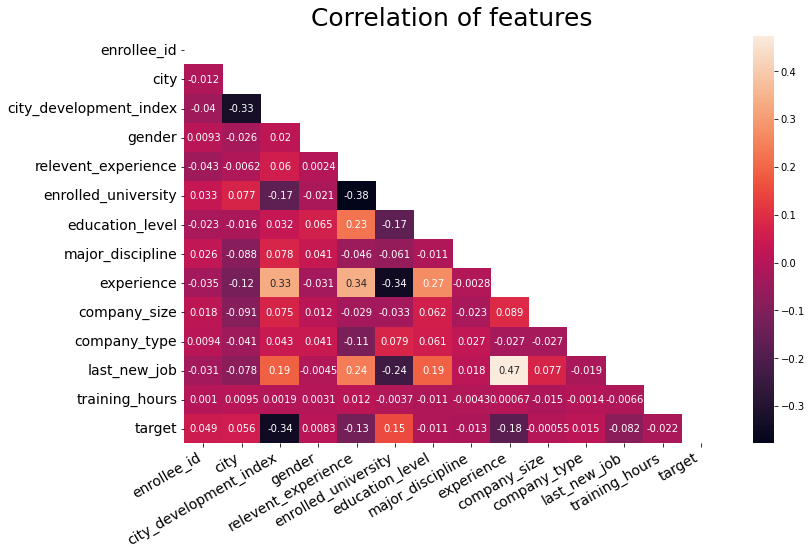

In [ ]:
plt.figure(figsize=(12,7.5))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 10})
plt.title('Correlation of features', fontsize=25, pad=10)
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=30, ha='right');
plt.show()

# One Hot Encoding
Now, the categorical features which are not ordinal will be one hot encoded

 **Dividing numeric and categorical data**

In [ ]:
numeric = data[["city_development_index", "training_hours", "target"]].copy()
category = data[["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]].copy()

#using the previously manual encoded columns
category_ordinalencoded = category[['education_level', 'experience', 'company_size', 'last_new_job']]


 **One Hot encoding the rest categorical columns**

In [ ]:
#columns that need to be one hot encoded
one_how_columns = [ col for col in category.columns if col not in ['education_level', 'experience', 'company_size', 'last_new_job']]

#onehotencoder
ohe = OneHotEncoder(sparse=False).fit(category.loc[:, one_how_columns])
category_onehotEncoded = ohe.transform(category.loc[:, one_how_columns])

#joining all the category columns
category_preprocessed = np.concatenate([category_onehotEncoded, category_ordinalencoded], axis=1)

#joining all the features
X = np.concatenate([numeric.drop('target', axis=1).values, category_preprocessed], axis=1)
y = numeric['target'].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  float64
 1   city                    19158 non-null  float64
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  float64
 4   relevent_experience     19158 non-null  float64
 5   enrolled_university     19158 non-null  float64
 6   education_level         19158 non-null  float64
 7   major_discipline        19158 non-null  float64
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  float64
 10  company_type            19158 non-null  float64
 11  last_new_job            19158 non-null  float64
 12  training_hours          19158 non-null  float64
 13  target                  19158 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


## Imbalanced data
As we can see clearly, the data is very imbalanced which needs to be dealt with if we want our model to train properly.
For this, I used SMOTE(Synthetic Minority Oversampling Technique) to make the data balanced.
> If you want to know more about SMOTE, check this [link](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

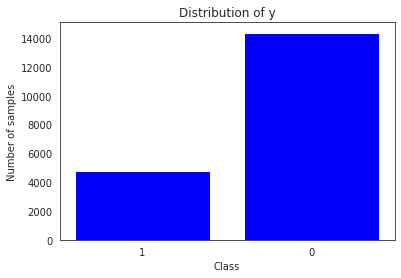

In [ ]:
count = Counter(y)
plt.bar(['1', '0'], count.values(), color = 'blue')
plt.title('Distribution of y')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
X, y = SMOTE(random_state = 99).fit_resample(X, y)

## Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 99)

# Comparing models
### Decision tree

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state = 99)
dtc.fit(X_train, y_train)

y_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_dtc)
print("Accuracy of Decision tree is", round(acc_dtc*100, 2), '%')

Accuracy of Decision tree is 79.65 %


In [ ]:
print(classification_report(y_test, y_dtc))
print("Accuracy of Decision tree is", round(acc_dtc*100, 2), '%')

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      2876
         1.0       0.79      0.80      0.80      2877

    accuracy                           0.80      5753
   macro avg       0.80      0.80      0.80      5753
weighted avg       0.80      0.80      0.80      5753

Accuracy of Decision tree is 79.65 %


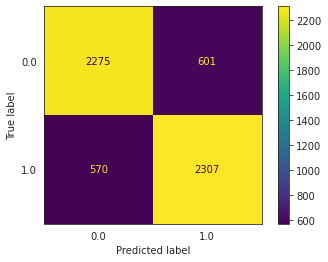

In [ ]:
cm_dtc = confusion_matrix(y_test, y_dtc, labels=dtc.classes_)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=dtc.classes_)

disp_dtc.plot()
plt.show()


### SVM

In [ ]:
#svm needs scaled data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_copy = X_train.copy()
test_copy = X_test.copy()

train_copy = sc_X.fit_transform(train_copy)
test_copy = sc_X.transform(test_copy)
svm = SVC(kernel = 'rbf', random_state=0)
svm.fit(train_copy, y_train)

#predicting test set
y_svm = svm.predict(test_copy)
acc_svm = accuracy_score(y_test, y_svm)
print("Accuracy of SVM is", round(acc_svm*100, 2), '%')

Accuracy of SVM is 79.16 %


In [ ]:
print(classification_report(y_test, y_svm))
print("Accuracy of SVM is", round(acc_svm*100, 2), '%')

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81      2876
         1.0       0.84      0.71      0.77      2877

    accuracy                           0.79      5753
   macro avg       0.80      0.79      0.79      5753
weighted avg       0.80      0.79      0.79      5753

Accuracy of SVM is 79.16 %


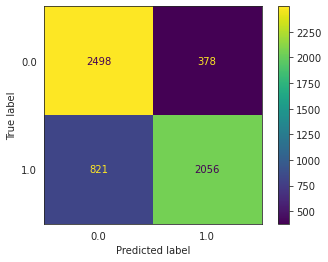

In [ ]:
cm_svm = confusion_matrix(y_test, y_svm, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)

disp_svm.plot()
plt.show()


### Random Forest

In [ ]:
rf1 = RandomForestClassifier(random_state = 0)
rf1.fit(X_train, y_train)

#predicting test set
y_rf1 = rf1.predict(X_test)
acc_rf = accuracy_score(y_test, y_rf1)
print("Accuracy of Random Forest is", round(acc_rf*100, 2), '%')

Accuracy of Random Forest is 84.5 %


In [ ]:
print(classification_report(y_test, y_rf1))
print("Accuracy of Random Forest is", round(acc_rf*100, 2), '%')

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2876
         1.0       0.89      0.79      0.84      2877

    accuracy                           0.84      5753
   macro avg       0.85      0.84      0.84      5753
weighted avg       0.85      0.84      0.84      5753

Accuracy of Random Forest is 84.5 %


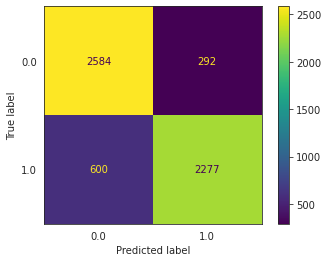

In [ ]:
cm_rf = confusion_matrix(y_test, y_rf1, labels=rf1.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf1.classes_)

disp_rf.plot()
plt.show()

In [ ]:
Models = {'Decision Tree':acc_dtc, 'SVM':acc_svm, 'Random Forest':acc_rf}
Models

{'Decision Tree': 0.7964540239874848,
 'Random Forest': 0.844950460629237,
 'SVM': 0.7915869980879541}

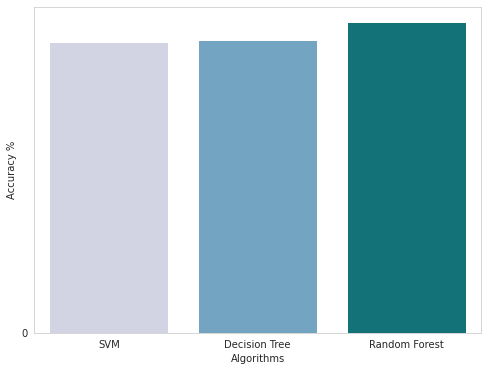

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(Models.keys()), y=list(Models.values()),
                 order={key:value for key,
                        value in sorted(Models.items(),
                                        key=lambda x: x[1])}, palette='PuBuGn')

plt.show()